In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../scripts")
from XGBoost_model import PortfolioPredictionXGBoost_volatility
from XGBoost_utils import compute_errors_volatility

## Imports des données

In [4]:
titres = {"Amazon": pd.read_csv("../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../data/BRK-B.csv"),
          "Google": pd.read_csv("../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../data/MSFT.csv"),
          "Exxon": pd.read_csv("../data/XOM.csv")}

## Modélisation

In [5]:
XGB = PortfolioPredictionXGBoost_volatility(titres, window_size=90, step_size=7, prediction_days=7)

In [6]:
predictions, ptf_avg = XGB.predict_avg_portfolio()

100%|██████████| 5/5 [36:45<00:00, 441.03s/it]


## Résultats

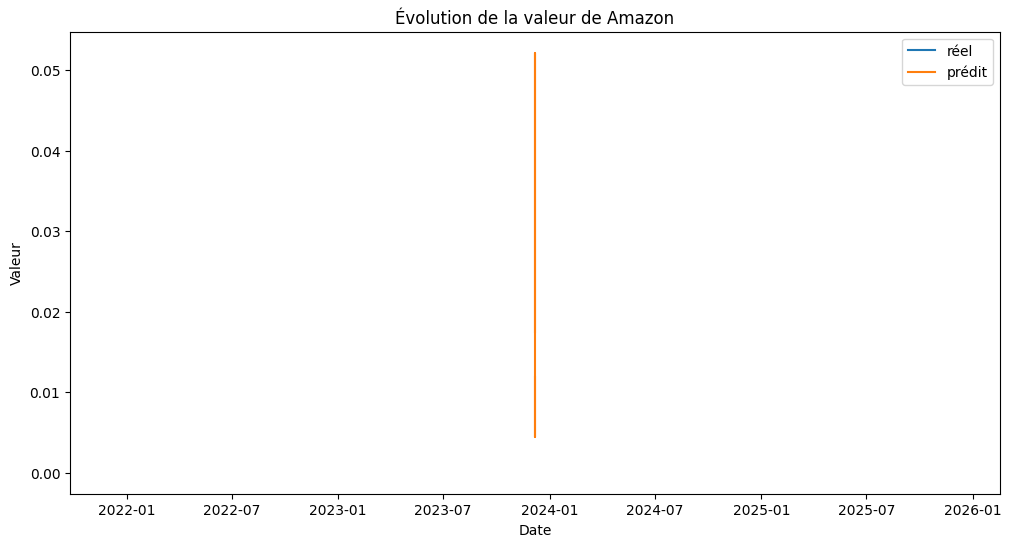

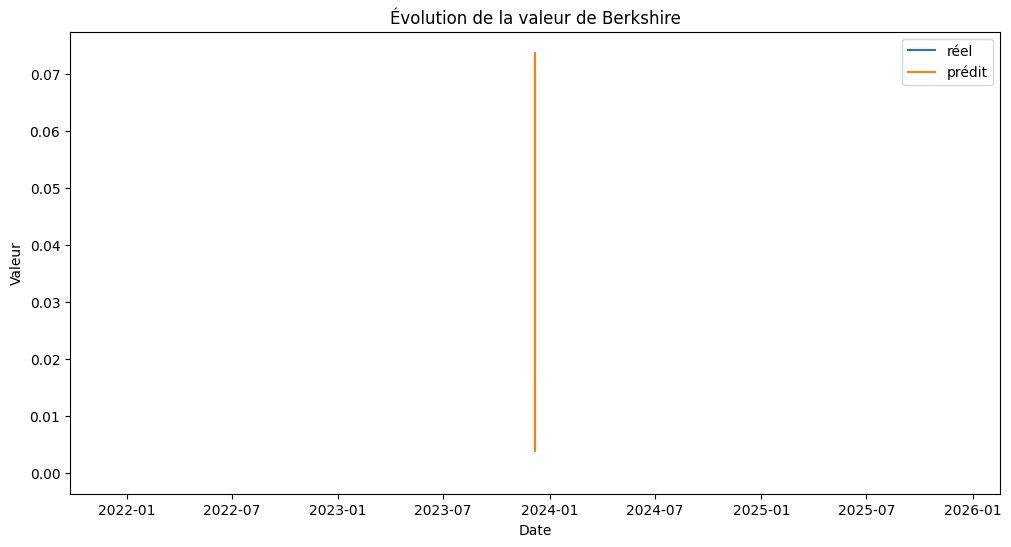

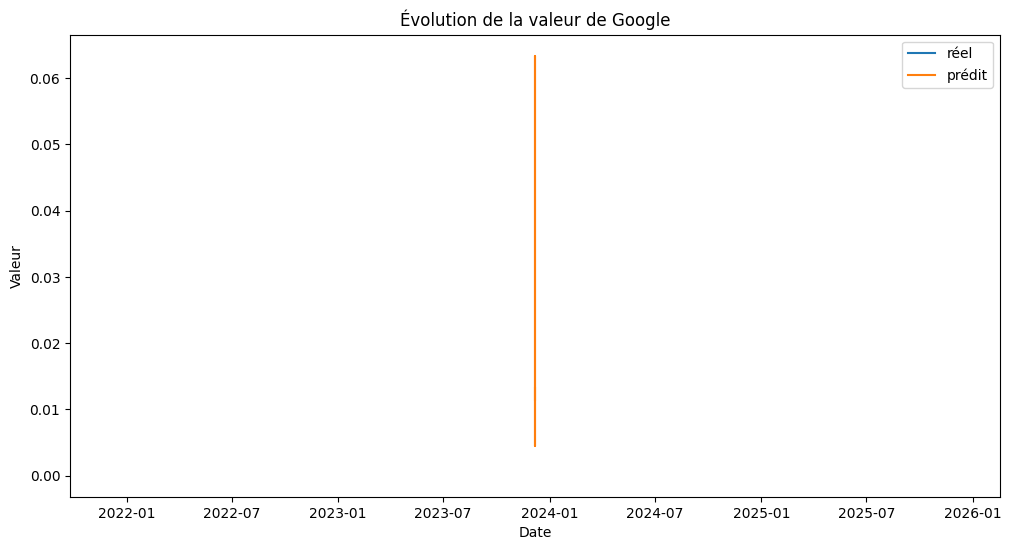

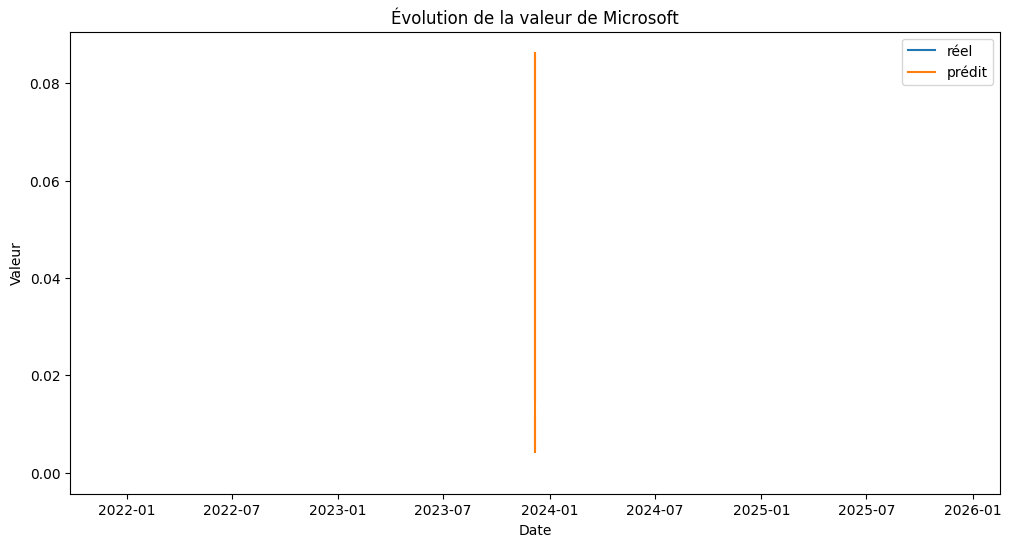

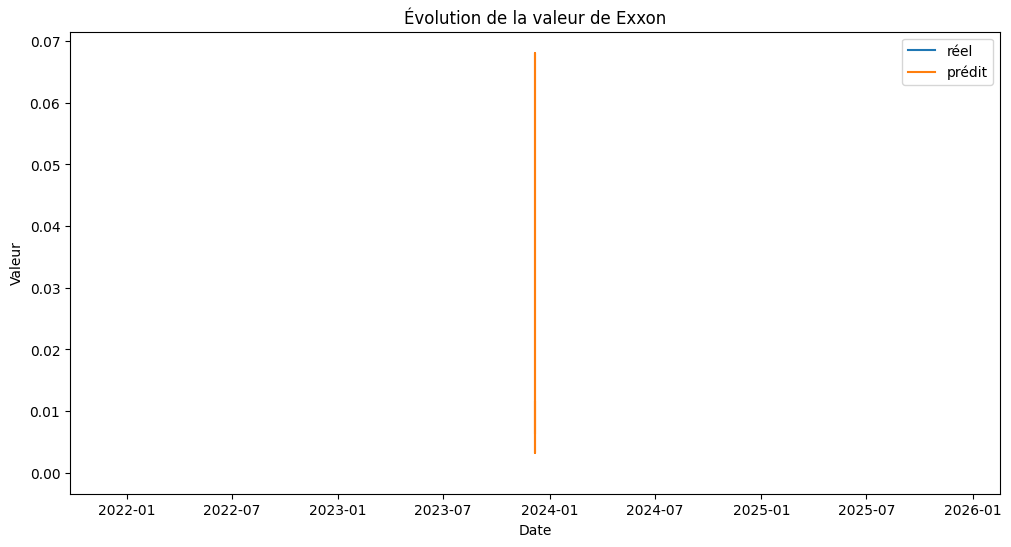

In [7]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    plt.plot(value.Date, value['Volatility'], label='réel')
    plt.fill_between(value.Date, value['Volatility'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

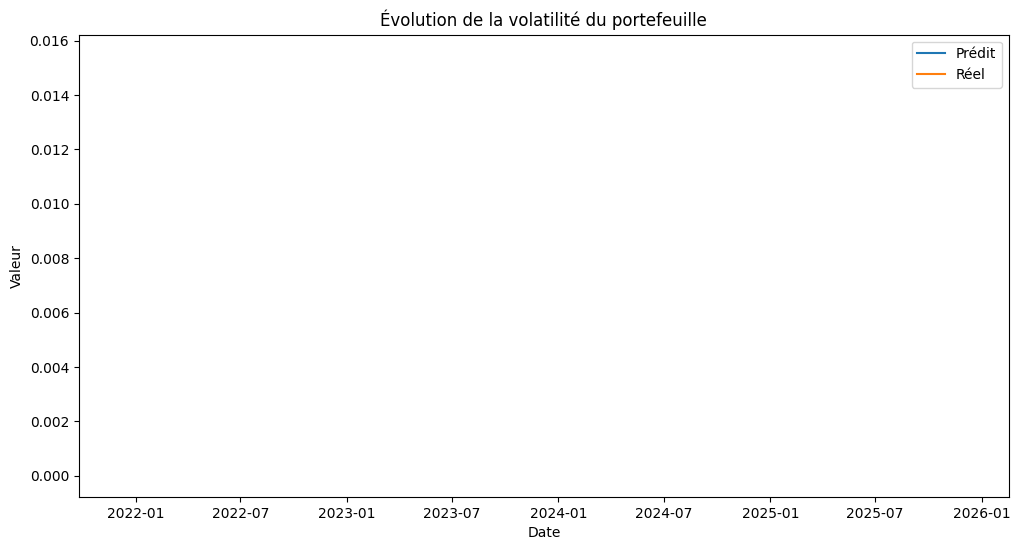

In [8]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Prediction'], label='Prédit')
plt.fill_between(ptf_avg.Date, ptf_avg['Prediction'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Volatility'], label='Réel')
plt.fill_between(ptf_avg.Date, ptf_avg['Volatility'], alpha=0.3)

plt.title(f"Évolution de la volatilité du portefeuille")
plt.xlabel('Date')
plt.ylabel('Valeur')

plt.legend()
plt.show()

## Erreurs

In [9]:
errors = compute_errors_volatility(predictions, ptf_avg)
errors

,MSE,RMSE,MAE
Portfolio,0.000021,0.004589,0.004589
Amazon,0.000175,0.013235,0.009156
Berkshire,0.000109,0.010427,0.006867
Google,0.000110,0.010471,0.008852
Microsoft,0.000134,0.011565,0.007351
Exxon,0.000122,0.011041,0.007210
